In [1]:
import tensorflow as tf

2025-07-29 04:10:07.279255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753762207.712768      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753762207.834855      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [8]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

2025-07-29 04:10:30.215522: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.7737 - loss: 0.7290 - val_accuracy: 0.9788 - val_loss: 0.0833
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9624 - loss: 0.1236 - val_accuracy: 0.9843 - val_loss: 0.0562
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9728 - loss: 0.0869 - val_accuracy: 0.9875 - val_loss: 0.0476
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9781 - loss: 0.0701 - val_accuracy: 0.9883 - val_loss: 0.0425
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9803 - loss: 0.0615 - val_accuracy: 0.9895 - val_loss: 0.0380


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03591408208012581
Test accuracy: 0.987500011920929


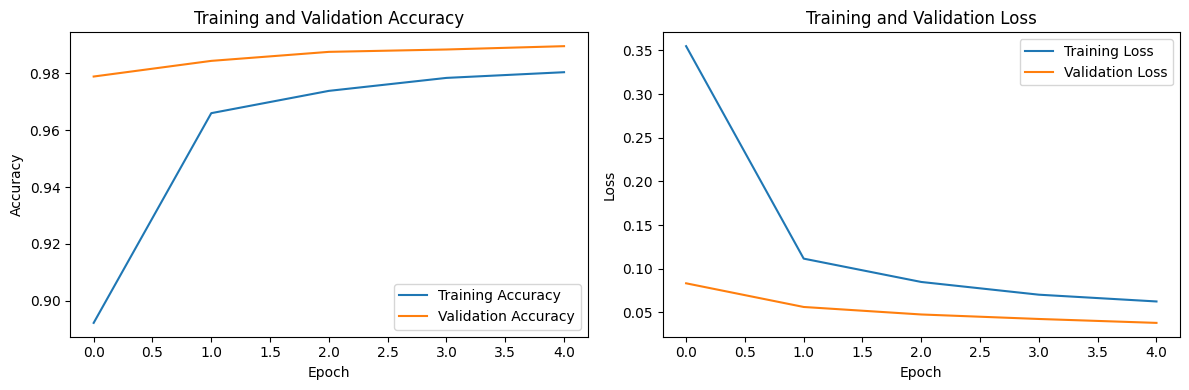

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Sample prediction
sample_idx = 0  # Change this to test different images
sample_image = x_test[sample_idx]

sample_label = np.argmax(y_test[sample_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


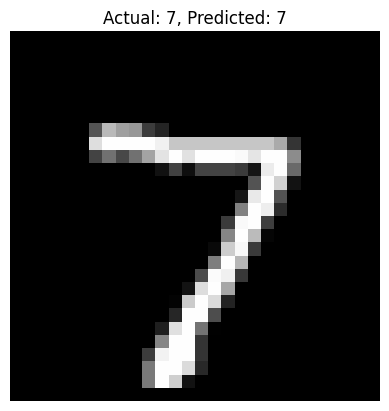

In [16]:
prediction = model.predict(np.expand_dims(sample_image, 0))
predicted_label = np.argmax(prediction)

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Actual: {sample_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()